# Minimum fuel optimal control

We consider a linear dynamical system with state $x(t) \in \mathbb{R}^n$, $t = 0, . . . , N$ , and actuator or input signal $u(t) \in \mathbb{R}$, for $t = 0, . . . , N − 1$. The dynamics of the system is given by the linear recurrence,
\begin{equation}
x(t+1) = Ax(t) + bu(t), ~t = 0, \ldots, N-1
\end{equation}

where $A \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ are given. We assume that the initial state is zero, i.e., $x(0) = 0$. 

In addition, the total fuel comsumed by the system is given by,
\begin{equation}
F = \sum_{t=0}^{N-1} f(u(t))
\end{equation}

where $N$ is the (given) time horizon and the function $f : \mathbb{R} \mapsto \mathbb{R}$ gives the amount of fuel used as a function of the actuator signal amplitude. In this problem we use,

\begin{equation}
 f(a)=
    \begin{cases}
      \mid a \mid,~\mid a \mid  \leq 1 \\
      2 \mid a \mid -1,~\mid a \mid > 1
    \end{cases}
\end{equation}

This means that fuel use is proportional to the absolute value of the actuator signal, for actuator signals between −1 and 1; for larger actuator signals the marginal fuel efficiency is half.


**The minimum fuel optimal control problem is to choose the inputs $u(0), \ldots, u(N − 1)$ so as to minimize the total fuel consumed, subject to the constraint that $x(N) = x_{des}$ where $x_{des} \in \mathbb{R}^n$ is the (given) desired final or target state.** 

In [23]:
# Import libraries
%matplotlib inline
import numpy as np
np.set_printoptions(precision=2, suppress=True)
import matplotlib.pyplot as plt
from cvxpy import *

## Problem Data

For this problem we are going to use the following given data,

* $N=30$
* $n=3$
* $A \in \mathbb{R}^{3 \times 3}$
* $b \in \mathbb{R}^3$
* $x_{des} \in \mathbb{R}^3$


In [24]:
# Data
N = 30
n = 3
print("N = {}".format(N))
A = np.array([[-1, 0.4, 0.8],[1, 0, 0], [0, 1, 0]], dtype=np.float)
print("A = {}".format(A))
b = np.array([1, 0, 0.3], dtype=np.float).reshape(n,1)
print("b = {}".format(b))
xdes = np.array([7, 2, -6], dtype=np.float)
print("Xdes = {}".format(xdes))

N = 30
A = [[-1.   0.4  0.8]
 [ 1.   0.   0. ]
 [ 0.   1.   0. ]]
b = [[ 1. ]
 [ 0. ]
 [ 0.3]]
Xdes = [ 7.  2. -6.]


## Problem Description
This problem can be stated as linear program through some work, but we are going to state it as a general convex optimization problem and let the CVXPY do the rest of the job.

\begin{equation}
\begin{aligned}
& \underset{x, u}{\text{minimize}}
& & \sum_{t=0}^{N-1} max(\mid u_t\mid, 2 \mid u_t\mid -1) \\
& \text{subject to}
& & x(0) = \mathbf{0}\\
& & & x(t+1) = Ax(t) + bu(t), ~for ~t=0,\ldots, N-1 \\
& & & x(N) = x_{des}
\end{aligned}
\end{equation}


Problem Status: optimal
Optimal value p* = : 17.323567851898524
Optimal solution u* = : [[ 0.    0.   -0.    1.   -1.    1.   -0.    0.    0.   -1.    1.   -1.
   0.25 -0.   -0.    0.   -1.    1.   -1.    0.   -0.   -0.    1.   -0.7
   1.   -0.    0.    0.    0.    3.19]]


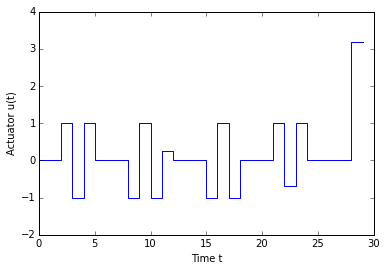

In [25]:
# Describe the convex problem
X = Variable(n, N+1)
u = Variable(1, N)
obj = Minimize(sum_entries(max_elemwise(abs(u), 2*abs(u)-1)))
constr = [X[:, 0] == 0, X[:, 1:] == A*X[:,:N] + b*u, X[:, -1] == xdes]
prob = Problem(obj, constr)

# solve the problem
prob.solve()
print("Problem Status: {}".format(prob.status))
print("Optimal value p* = : {}".format(prob.value))
print("Optimal solution u* = : {}".format(u.value))
plt.step(np.arange(N), np.ravel(u.value))
plt.xlabel('Time t')
plt.ylabel('Actuator u(t)')